<a href="https://colab.research.google.com/github/nilradi/DS-Projects/blob/main/Efectos_de_lavarse_las_manos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## YEARLY DEATHS

In [3]:
yearlydf = pd.read_csv("/content/drive/MyDrive/proyectos/P2/Data/yearly_deaths_by_clinic.csv")

In [6]:
yearlydf

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
yearlydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [8]:
yearlydf.groupby("clinic")['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [ ]:
# Para poder verlo de manera más clara, crearemos la columna "Proporción de Fallecidos"

In [9]:
yearlydf['% Deaths'] = yearlydf['deaths'] / yearlydf['births'] 

In [11]:
yearlydf

,year,births,deaths,clinic,% Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [ ]:
# Para poder visualizarlo mejor, diviremos el dataset en clinica 1 y clinica 2

In [14]:
clinic1 = yearlydf[yearlydf['clinic'] == 'clinic 1']
clinic2 = yearlydf[yearlydf['clinic'] == 'clinic 2']

Text(0, 0.5, 'Number of deaths')

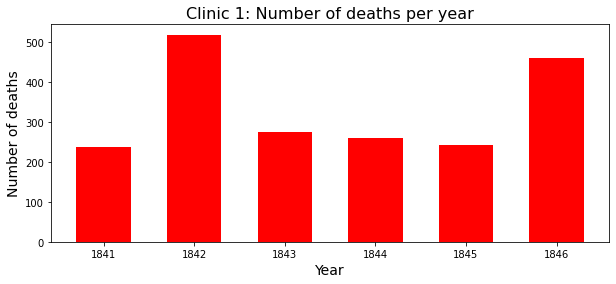

In [21]:
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic1.year, clinic1.deaths, width = 0.6, color  ='r')
plt.title("Clinic 1: Number of deaths per year", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of deaths", fontsize = 14)

Text(0, 0.5, 'Number of deaths')

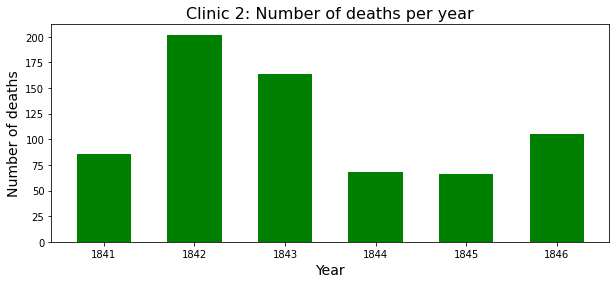

In [24]:
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic2.year, clinic2.deaths, width = 0.6, color  ='green')
plt.title("Clinic 2: Number of deaths per year", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of deaths", fontsize = 14)

#### Vemos como en 1842, para ambas clinicas fue un año complicado. Para la clinica 2, 1843 fue el segundo peor año, mientras que para la clinica 1 hasta el año 1846 no se volío a vivir una situación similar


In [ ]:
#Ahora querremos ver la % de fallecidos, no solo los totales:

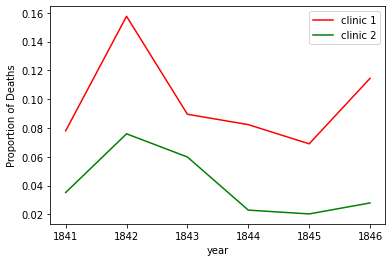

In [30]:
ax = clinic1.plot(x = 'year', y= '% Deaths', label = 'clinic 1', color = 'red')
clinic2.plot(x = 'year', y= '% Deaths', label = 'clinic 2', ax=ax, ylabel = "Proportion of Deaths",color = 'green')

#### Al investigar más a fondo el motivo de esta diferencia, el Dr.Semmelweis descubrió que en la Clinica 1, los estudiantes de medicina pasaban mucho tiempo en la sala de autopsias, como parte de su aprendizaje. De esta manera, al ayudar en los partos, contagiaban de las bacterias a las mujeres, siendo la muerte por parto la causa principal de la alta tasa de mortalidad

## MONTHLY DATA

In [32]:
monthlydf = pd.read_csv('/content/drive/MyDrive/proyectos/P2/Data/monthly_deaths.csv')
monthlydf

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [33]:
monthlydf.info()
# vemos que date deberia estar en pddatetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [ ]:
# DIRECTAMENTE PROCEDEMOS A CALCULAR LA PROPORCION DE FALLECIDOS

In [34]:
monthlydf['% Deaths'] = monthlydf['deaths'] / monthlydf['births']

In [35]:
monthlydf.head()

,date,births,deaths,% Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### Sabemos que el doctor Semmelweis ordenó a todos los doctores lavarse correctamente las manos en el verano de 1847, para ver si afectaba al número de muertes

In [37]:
monthlydf['date'] = pd.to_datetime(monthlydf['date'])

In [38]:
monthlydf.dtypes

date        datetime64[ns]
births               int64
deaths               int64
% Deaths           float64
dtype: object

In [ ]:
# Como hemos hecho antes con las clinicas, vamos a separar el data frame entre antes y después del verano de 1847

In [40]:
start_handwashing = pd.to_datetime('1847-06-01')
before_washing = monthlydf[monthlydf['date'] < start_handwashing]
after_washing = monthlydf[monthlydf['date'] >= start_handwashing]

Text(0, 0.5, '% Deaths')

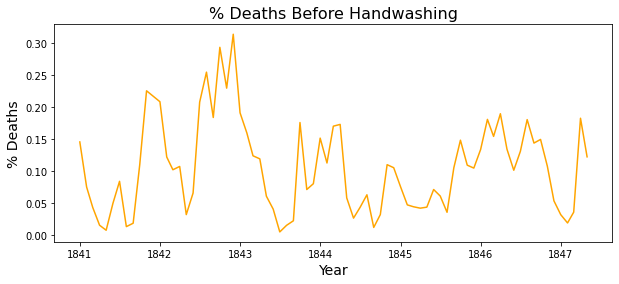

In [43]:
fig,ax = plt.subplots(figsize = (10,4))
x = before_washing['date']
y = before_washing['% Deaths']
plt.plot(x, y, color  = 'orange')
plt.title("% Deaths Before Handwashing", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("% Deaths", fontsize = 14)

Text(0, 0.5, '% Deaths')

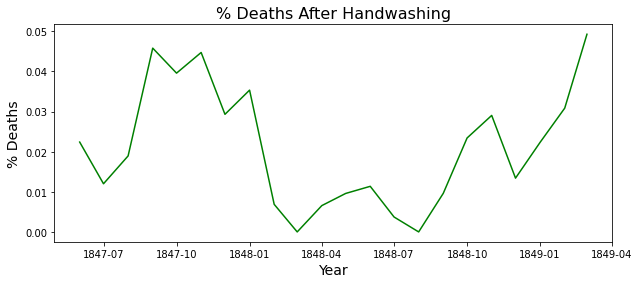

In [44]:
fig,ax = plt.subplots(figsize = (10,4))
x = after_washing['date']
y = after_washing['% Deaths']
plt.plot(x, y, color  = 'green')
plt.title("% Deaths After Handwashing", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("% Deaths", fontsize = 14)

In [ ]:
## VAMOS A UNIFICAR LOS DOS GRÁFICOS PARA VERLO MEJOR

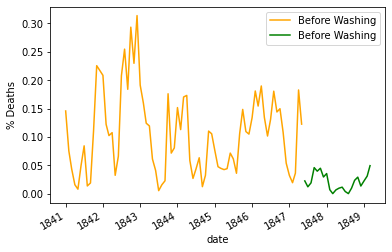

In [46]:
ax = before_washing.plot(x = 'date', y = '% Deaths', label = "Before Washing", color = 'orange')
after_washing.plot(x = 'date', y = '% Deaths', label = "Before Washing", ax=ax, ylabel = "% Deaths", color = 'green')

#### Se aprecia muy claramente como el porcentaje de fallecidos disminuyó

In [ ]:
## Vamos a calcular la media de % de fallecimiento antes y después

In [54]:
before_prop = before_washing['% Deaths']
after_prop = after_washing['% Deaths']

before_prop.mean()

0.10504998260908789

In [55]:
mean_diff = before_prop.mean() - after_prop.mean()

In [56]:
mean_diff

0.08395660751183336

#### Vemos como disminuyó en un 8% la tasa de mortalidad a partir de la fecha en que se obligó a lavar las manos a los doctores